In [1]:
import pandas as pd

df = (
    pd.read_csv("facebook/reaction_counts.csv")
    .assign(status_published=lambda df_: pd.to_datetime(df_["status_published"]))
    .assign(num_negatives=lambda df_: df_["num_sads"] + df_["num_angrys"])
    .set_index("status_id")
)

print(df.info())
print(df["num_reactions"].describe())

print(df["num_reactions"] > 50000)
print(df[df["num_reactions"] > 50000])

print(df["status_published"].dtype)

print(df["status_type"].unique())
print(df["status_type"].value_counts())

print(df.groupby("status_type")["num_reactions"].mean())
print(
    df.groupby("status_type")[
        [
            "num_reactions",
            "num_comments",
            "num_shares",
            "num_likes",
            "num_loves",
            "num_wows",
            "num_hahas",
            "num_sads",
            "num_angrys",
            "num_negatives",
        ]
    ].mean()
)

print(df.set_index("status_published").resample("M")[
            "num_reactions",
            "num_comments",
            "num_shares",
            "num_likes",
            "num_loves",
            "num_wows",
            "num_hahas",
            "num_sads",
            "num_angrys",
            "num_negatives",
        ].sum())


<class 'pandas.core.frame.DataFrame'>
Index: 4160 entries, 153080620724_10157915294545725 to 153080620724_162861335065
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_message    3793 non-null   object        
 1   link_name         2715 non-null   object        
 2   status_type       4160 non-null   object        
 3   status_link       2983 non-null   object        
 4   status_published  4160 non-null   datetime64[ns]
 5   num_reactions     4160 non-null   int64         
 6   num_comments      4160 non-null   int64         
 7   num_shares        4160 non-null   int64         
 8   num_likes         4160 non-null   int64         
 9   num_loves         4160 non-null   int64         
 10  num_wows          4160 non-null   int64         
 11  num_hahas         4160 non-null   int64         
 12  num_sads          4160 non-null   int64         
 13  num_angrys        4160 non-null  

/var/folders/l5/kgrw0xy156z2lt7wy2wvprt80000gp/T/ipykernel_79949/2461619321.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/l5/kgrw0xy156z2lt7wy2wvprt80000gp/T/ipykernel_79949/2461619321.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(df.set_index("status_published").resample("M")[


/var/folders/l5/kgrw0xy156z2lt7wy2wvprt80000gp/T/ipykernel_79949/1240412906.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("status_published").resample("M")[


<Axes: xlabel='status_published'>

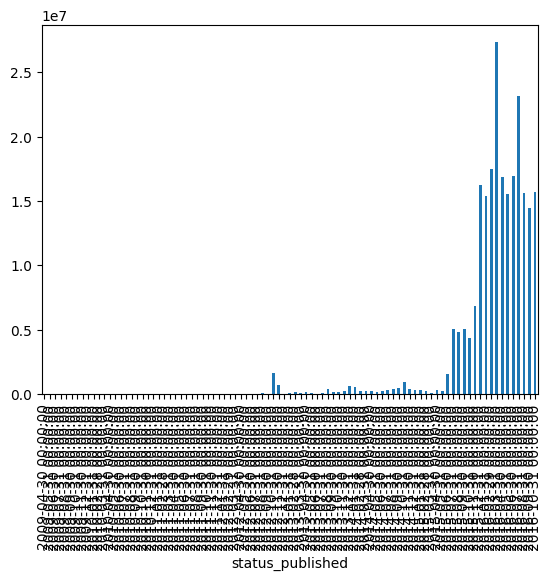

In [6]:
df.set_index("status_published").resample("M")[
            "num_reactions",
            "num_comments",
            "num_shares",
            "num_likes",
            "num_loves",
            "num_wows",
            "num_hahas",
            "num_sads",
            "num_angrys",
            "num_negatives",
        ].sum()["num_reactions"].plot.bar()

/var/folders/l5/kgrw0xy156z2lt7wy2wvprt80000gp/T/ipykernel_79949/3101578033.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("status_published").resample("M")[


<Axes: xlabel='status_published'>

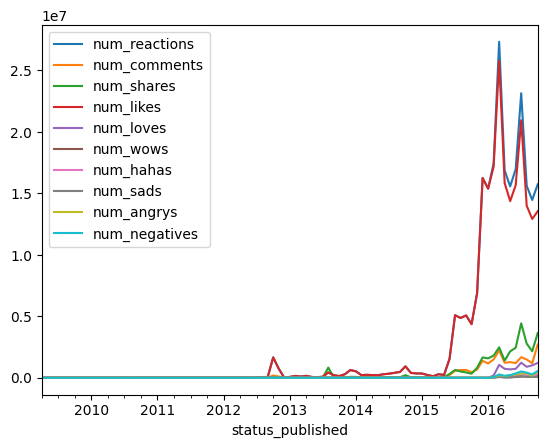

In [8]:
df.set_index("status_published").resample("M")[
            "num_reactions",
            "num_comments",
            "num_shares",
            "num_likes",
            "num_loves",
            "num_wows",
            "num_hahas",
            "num_sads",
            "num_angrys",
            "num_negatives",
        ].sum().plot()